In [9]:
import numpy as np
import scipy.special

import matplotlib.pyplot
%matplotlib inline

In [5]:
data_file = open("mnist_datasets/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [6]:
len(data_list)

100

In [7]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

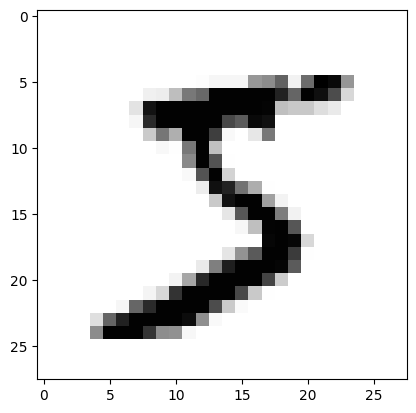

In [11]:
all_values = data_list[0].split(',')
# convert the text string into real numbers array
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

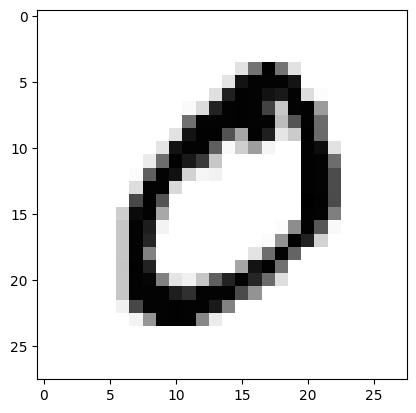

In [13]:
all_values = data_list[1].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation='None')

In [14]:
scaled_input = (np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [ ]:
# output nodes is 10 example
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [ ]:
class neuralNetwork:
  # initialise the neural network
  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    self.inodes = input_nodes
    self.hnodes = hidden_nodes
    self.onodes = output_nodes

    # link weight matrices, wih and who
    # weights inside the arrays are w_i_j, where link is from node i to node j in
    # the next layer # w11 w21
    self.wih = (np.random.rand(self.hnodes, self.inodes) -0.5) # np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = (np.random.rand(self.onodes, self.hnodes) -0.5) # np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    self.lr = learning_rate

    self.activation_function = lambda x: scipy.special.expit(x)
    pass

  # train the neural network
  def train(self, inputs_list, targets_list):
    # convert inputs list to 2d Array
    inputs = np.array(inputs_list, ndmin=2).T 
    targets = np.array(targets_list, ndmin=2).T

    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih, inputs) # 100 x 728 . 728 x 1 
    # calculate the signald emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    # error is the (target - actual)
    output_errors = targets - final_outputs

    # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
    hidden_errros = np.dot(self.who.T, output_errors)

    # update the weights for the links between the hidden and output layers
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
    # update the weights for the links between the input and hidden layers
    self.wih += self.lr * np.dot((hidden_errros * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
    pass
  
  # query the neural network
  def query(self, inputs_list):
    # convert inputs list to 2d Array
    inputs = np.array(inputs_list, ndmin=2).T

    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)

    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [27]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

n.query([1.0, 0.5, -1.5])

array([[0.50756685],
       [0.48641743],
       [0.51616182]])

In [ ]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open('mnist_datasets/mnist_train_100.csv')
training_data_list = training_data_file.readlines()
training_data_file.close()

# training the neural network
# go through all records in the training data set
epochs = 10

for e in range(epochs):
  for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = ((np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01)
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    # print(targets)
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    print(targets)
    n.train(inputs, targets)
    pass
  pass

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01]
[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01 0.01 0

In [61]:
# load the mnist test data CSV file into a list
test_data_file = open('mnist_datasets/mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [62]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


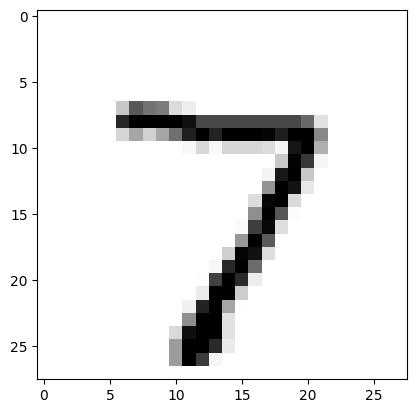

In [63]:
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [67]:
scorecard = []
for record in test_data_list:
  # split the record by the ',' commas
  all_values = record.split(',')
  # correct answer is firts value
  correct_label = int(all_values[0])
  print(correct_label, "correct_label")
  # scale and shift the inputs
  inputs = (np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
  # query the network
  outputs = n.query(inputs)
  # the index of the highest values correspond to the label
  label = np.argmax(outputs)
  print(label, "network's answer")
  # append correct or incorrect to list
  if (label == correct_label):
    #  network's answer matches correct answer, add 1 to scorecard
    scorecard.append(1)
  else:
    # network's answer doesn't match correct answer, add 0 to scorecard
    scorecard.append(0)
  pass
print(scorecard)

7 correct_label
7 network's answer
2 correct_label
2 network's answer
1 correct_label
1 network's answer
0 correct_label
0 network's answer
4 correct_label
4 network's answer
1 correct_label
1 network's answer
4 correct_label
4 network's answer
9 correct_label
3 network's answer
5 correct_label
8 network's answer
9 correct_label
4 network's answer
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [68]:
# calculate the performance score, te fraction of correct answers
scorecard_array = np.asarray(scorecard, dtype=float)
print('performance = ', scorecard_array.sum() / scorecard_array.size)

performance =  0.7
